In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, KFold
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# Load Data

df = pd.read_csv("data_processed.csv")

df.head(10)

,ID,Player,Win,Game,PA,AB,Run,H,2B,3B,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,aaronha01,Henry Aaron(1954~1976),1692,3234,13666,12121,2128,3703,614,96,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,aaronto01,Tommie Aaron(1962~1971),161,373,1045,944,99,216,42,6,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,abbotje01,Jeff Abbott(1997~2001),98,212,651,596,82,157,33,2,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,abbotku01,Kurt Abbott(1993~2001),308,665,2227,2044,268,523,109,23,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,abercre01,Reggie Abercrombie(2006~2008),63,140,421,386,56,86,20,2,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,abernbr01,Brent Abernathy(2001~2005),91,230,955,868,97,212,36,5,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,aberscl01,Cliff Aberson(1947~1949),24,63,205,179,25,45,7,3,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,abnersh01,Shawn Abner(1987~1992),157,323,902,840,81,191,39,4,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,abramca01,Cal Abrams(1949~1956),194,546,1943,1612,255,433,64,19,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,abreubo01,Bobby Abreu(1996~2014),1226,2412,10081,8480,1453,2470,574,59,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [3]:
print(df.columns)

Index(['ID', 'Player', 'Win', 'Game', 'PA', 'AB', 'Run', 'H', '2B', '3B', 'HR',
       'BB', 'SF', 'HBP', 'SB', 'Date_min', 'Date_max', '1B', 'XBH', 'AVG',
       'SLG', 'OBP', 'OPS', 'Hard_Hit_Efficiency', 'Speed_Score',
       'Runs_per_PA', '1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA',
       'BB_per_PA', 'SB_per_PA', 'HBP_per_PA', 'SF_per_PA', 'WPA_total',
       'High_Leverage_PA_total', 'WPA_per_High_Leverage_PA',
       'Hits_Rolling_Std'],
      dtype='object')


In [4]:
# Classify Columns

id = ["ID", "Player"]
y = ["Runs_per_PA"]
exclude = ["Win", "Game", "Date_min", "Date_max"]

In [5]:
# Choose attributes

y_data = df.loc[:, y]
x_data = df.drop(columns=id + y + exclude)

x_data.head(10)

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,13666,12121,2128,3703,614,96,740,1372,120.0,32,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,1045,944,99,216,42,6,13,85,6.0,0,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,651,596,82,157,33,2,18,38,7.0,3,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,2227,2044,268,523,109,23,62,133,12.0,17,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,421,386,56,86,20,2,9,21,2.0,7,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,955,868,97,212,36,5,8,60,4.0,7,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,205,179,25,45,7,3,5,26,0.0,0,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,902,840,81,191,39,4,11,43,7.0,7,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,1943,1612,255,433,64,19,32,305,3.0,7,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,10081,8480,1453,2470,574,59,288,1476,85.0,33,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [6]:
# Correlation Matrix

cor_matrix = x_data.corr()
n_attributes = len(x_data.columns)

cor_matrix.head(n_attributes)

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
PA,1.000000,0.999030,0.981929,0.993879,0.974596,0.794315,0.812813,0.923506,0.812539,0.703009,...,0.085909,0.297564,0.216741,0.169573,-0.023264,0.165370,-0.056985,0.983714,0.261945,0.566766
AB,0.999030,1.000000,0.977501,0.994701,0.974351,0.796585,0.804736,0.906258,0.812830,0.698113,...,0.088194,0.292225,0.190281,0.171050,-0.026665,0.166469,-0.075931,0.983620,0.258241,0.571373
Run,0.981929,0.977501,1.000000,0.983888,0.971494,0.815936,0.839354,0.939109,0.777155,0.704059,...,0.115799,0.325546,0.252353,0.206488,-0.008743,0.137794,0.051583,0.954401,0.273769,0.566320
H,0.993879,0.994701,0.983888,1.000000,0.980732,0.817765,0.800125,0.903681,0.792710,0.688739,...,0.110035,0.281508,0.186318,0.172657,-0.029247,0.146861,-0.022948,0.975102,0.266007,0.584103
2B,0.974596,0.974351,0.971494,0.980732,1.000000,0.771636,0.824587,0.895938,0.800868,0.712405,...,0.077490,0.327793,0.197901,0.138580,0.001179,0.168167,-0.016578,0.955430,0.261821,0.572037
3B,0.794315,0.796585,0.815936,0.817765,0.771636,1.000000,0.496004,0.703797,0.433419,0.448442,...,0.426206,0.068848,0.128868,0.277639,-0.092109,-0.053879,0.046270,0.757992,0.236909,0.529193
HR,0.812813,0.804736,0.839354,0.800125,0.824587,0.496004,1.000000,0.833090,0.793688,0.662620,...,-0.062945,0.601255,0.277336,0.015983,0.054648,0.240546,0.127300,0.820593,0.236122,0.402525
BB,0.923506,0.906258,0.939109,0.903681,0.895938,0.703797,0.833090,1.000000,0.744371,0.648054,...,0.053362,0.340754,0.435627,0.133682,-0.021577,0.141998,0.132607,0.903957,0.275626,0.474260
SF,0.812539,0.812830,0.777155,0.792710,0.800868,0.433419,0.793688,0.744371,1.000000,0.640505,...,-0.120519,0.383541,0.158315,0.102256,0.035567,0.465656,-0.078612,0.834558,0.193002,0.365907
HBP,0.703009,0.698113,0.704059,0.688739,0.712405,0.448442,0.662620,0.648054,0.640505,1.000000,...,-0.035677,0.338873,0.152344,0.119150,0.398664,0.188571,-0.048185,0.683893,0.186760,0.398477


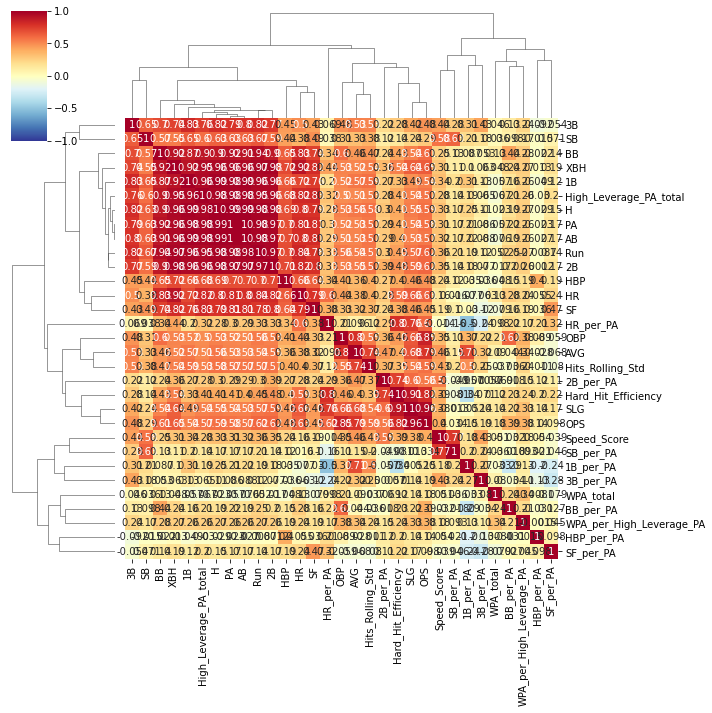

In [7]:
# Correaltion Plot

sns.clustermap(cor_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


In [8]:
# Scaler

scaler = StandardScaler()
scaler.fit(x_data)
scaled_x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

scaled_x_data.head(10)

,PA,AB,Run,H,2B,3B,HR,BB,SF,HBP,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,4.649536,4.657758,5.699235,5.133670,4.530358,3.701038,8.214034,4.580866,5.424509,0.760574,...,0.139064,2.600777,0.670421,0.361770,-0.691372,0.895761,6.370363,4.546692,1.170251,1.231688
1,-0.491300,-0.488382,-0.514364,-0.518442,-0.473189,-0.428008,-0.457003,-0.441609,-0.345070,-0.665912,...,-0.131376,-0.427270,0.001731,-0.273281,-1.054536,0.191382,-1.326995,-0.388030,-1.332711,-0.454981
2,-0.651786,-0.648608,-0.566425,-0.614076,-0.551916,-0.611522,-0.397367,-0.625025,-0.294459,-0.532179,...,-0.694012,0.676941,-0.804257,-0.230410,-0.339819,1.352735,0.574261,-0.700137,0.866524,0.684248
3,-0.009843,0.018083,0.003181,-0.020823,0.112890,0.351922,0.127428,-0.254290,-0.041408,0.091909,...,0.835250,0.690762,-0.756888,-0.247149,0.129384,0.109523,0.406789,-0.068551,0.534963,0.111660
4,-0.745471,-0.745297,-0.646047,-0.729160,-0.665633,-0.611522,-0.504711,-0.691367,-0.547511,-0.353868,...,-0.340256,0.221589,-1.102205,1.475300,1.524216,-0.038298,0.077079,-0.823013,-1.983790,-0.349418
5,-0.527960,-0.523374,-0.520489,-0.524926,-0.525674,-0.473887,-0.516638,-0.539171,-0.446290,-0.353868,...,-0.238031,-0.722259,-0.647906,0.675960,0.082275,-0.168571,-0.705330,-0.474044,-0.918848,1.198049
6,-0.833453,-0.840605,-0.740981,-0.795618,-0.779350,-0.565643,-0.552420,-0.671854,-0.648732,-0.665912,...,1.742900,0.440300,1.598044,-0.884421,-1.054536,-1.139285,0.559682,-0.857419,1.642649,0.055720
7,-0.549548,-0.536265,-0.569487,-0.558965,-0.499432,-0.519765,-0.480857,-0.605512,-0.294459,-0.353868,...,-0.406860,-0.445062,-1.179737,-0.412402,0.149072,0.659279,-0.117682,-0.528110,-0.275460,-1.234632
8,-0.125523,-0.180819,-0.036630,-0.166705,-0.280745,0.168409,-0.230387,0.416934,-0.496901,-0.353868,...,0.719516,-0.134752,2.655869,-0.446170,-0.495784,-0.781450,0.242308,-0.297102,0.371889,0.388418
9,3.189279,2.981361,3.632119,3.135089,4.180459,2.003541,2.822963,4.986722,3.653147,0.805152,...,-0.107988,0.743648,2.285310,1.924140,-0.546840,0.814828,3.139424,3.020565,0.948592,0.961614


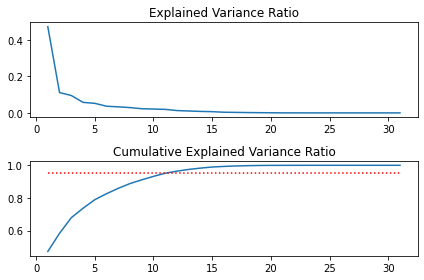

In [9]:
# PCA

pca0 = PCA()
pca0.fit(scaled_x_data)
explained_variance_ratio_0 = pca0.explained_variance_ratio_

cumulative_explained_variance_ratio_0 = []
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    cumulative_explained_variance_ratio_0.append(cur)

plt.subplot(2, 1, 1)
plt.plot(range(1, n_attributes + 1), explained_variance_ratio_0)
plt.title("Explained Variance Ratio")
plt.subplot(2, 1, 2)
plt.plot(range(1, n_attributes + 1), cumulative_explained_variance_ratio_0)
plt.plot(range(1, n_attributes + 1), [0.95 for i in range(n_attributes)], "r:")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

In [10]:
# PCA limited

threshold_PCA = 0.95

n_comp = 0
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    n_comp += 1
    if cur > threshold_PCA:
        break

pca1 = PCA(n_components=n_comp)
pca1.fit(scaled_x_data)
explained_variance_ratio_1 = pca1.explained_variance_ratio_

print(explained_variance_ratio_1)

x_pca = pd.DataFrame(pca1.transform(scaled_x_data), columns=["PC" + str(i) for i in range(n_comp)])

x_pca.head(10)

[0.4724399  0.11148211 0.09535175 0.05774299 0.05241278 0.03662205
 0.03306377 0.02909077 0.02283547 0.02116361 0.01927871]


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,18.263696,-1.559552,-3.177954,-2.388445,3.099728,-1.816823,2.437149,4.202238,-1.226937,-2.858934,-3.334641
1,-2.369275,0.107983,-0.841978,0.415522,-0.675173,-1.251184,-0.380489,-1.248486,-0.087219,0.078467,-0.094885
2,-1.034364,-1.405270,1.804041,0.634059,-0.802490,-0.110682,2.072993,0.108536,-0.103509,-0.012387,-0.013651
3,0.699409,-0.870064,1.310127,0.799441,-0.305287,-0.768714,0.175160,1.135370,0.338609,0.394928,-0.048643
4,-2.506128,-0.541185,0.506490,3.356837,0.224672,0.136226,-0.914602,0.160095,-0.693341,-0.828737,-0.877371
5,-1.980935,1.302391,0.119808,0.946707,-0.825733,0.338888,-0.121764,-0.538761,-0.234216,-0.619285,0.082387
6,-1.660338,-0.801011,2.667500,-2.180034,1.232478,-0.995150,-0.238983,0.043750,1.078504,0.518872,1.075980
7,-2.719510,-0.321120,-0.913865,0.979977,-0.553714,-0.162578,0.593594,0.564970,-0.305655,0.653570,-0.474493
8,0.346667,-0.074999,1.750170,-2.714816,1.223555,0.078784,-0.996397,-1.549702,0.470840,0.148263,0.176625
9,13.289036,0.537665,-1.116918,0.337412,4.285618,-0.706500,1.412248,-0.368252,-2.055134,-0.637683,-1.732371


In [11]:
# Split data

x_train, x_test, y_train, y_test = train_test_split(x_pca, y_data, test_size=0.2, shuffle=True, random_state=195)


In [30]:
# KFold

n_s = 10
kf = KFold(n_splits=n_s, shuffle=True, random_state=195)


In [40]:
# Simple linear regresssion

model_lm = LinearRegression()
model_lm_best = LinearRegression()
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_lm.fit(x_t, y_t)
    
    r2_validation = r2_score(y_v, model_lm.predict(x_v))
    print(f"R_squared of validation {i}: {r2_validation:.4f}")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_lm_best.fit(x_t, y_t)

r2_test = r2_score(y_test, model_lm_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared of validation 0: 0.6059
R_squared of validation 1: 0.6403
R_squared of validation 2: 0.6499
R_squared of validation 3: 0.6549
R_squared of validation 4: 0.6396
R_squared of validation 5: 0.6898
R_squared of validation 6: 0.6220
R_squared of validation 7: 0.6842
R_squared of validation 8: 0.5958
R_squared of validation 9: 0.6120
R_squared of test data: 0.6110


In [41]:
# Random forest

model_rf = RandomForestRegressor(n_estimators=200)
model_rf_best = RandomForestRegressor(n_estimators=200)
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_rf.fit(x_t, np.ravel(y_t))
    
    r2_validation = r2_score(y_v, model_rf.predict(x_v))
    print(f"R_squared of validation {i}: {r2_validation:.4f}")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_rf_best.fit(x_t, np.ravel(y_t))

r2_test = r2_score(y_test, model_rf_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared of validation 0: 0.6048
R_squared of validation 1: 0.6440
R_squared of validation 2: 0.6404
R_squared of validation 3: 0.6451
R_squared of validation 4: 0.6017
R_squared of validation 5: 0.6870
R_squared of validation 6: 0.6075
R_squared of validation 7: 0.6699
R_squared of validation 8: 0.5875
R_squared of validation 9: 0.5964
R_squared of test data: 0.5821


In [39]:
# Expected Runs per PA

expected_lm = model_lm_best.predict(x_pca)
expected_rf = model_rf_best.predict(x_pca)
df["Expected_Runs_per_PA_lm"] = expected_lm
df["Expected_Runs_per_PA_rf"] = expected_rf


df.loc[:, ["Player", "Runs_per_PA", "Expected_Runs_per_PA_lm", "Expected_Runs_per_PA_rf"]].head(30)

,Player,Runs_per_PA,Expected_Runs_per_PA_lm,Expected_Runs_per_PA_rf
0,Henry Aaron(1954~1976),0.155715,0.157953,0.158416
1,Tommie Aaron(1962~1971),0.094737,0.092467,0.092814
2,Jeff Abbott(1997~2001),0.125960,0.108940,0.121568
3,Kurt Abbott(1993~2001),0.120341,0.114716,0.113812
4,Reggie Abercrombie(2006~2008),0.133017,0.108818,0.122876
5,Brent Abernathy(2001~2005),0.101571,0.101712,0.103870
6,Cliff Aberson(1947~1949),0.121951,0.118836,0.120175
7,Shawn Abner(1987~1992),0.089800,0.085622,0.083844
8,Cal Abrams(1949~1956),0.131240,0.122053,0.125756
9,Bobby Abreu(1996~2014),0.144133,0.158833,0.142632


In [103]:
df.to_csv(path_or_buf="Result.csv", index=False)